# alumno: Mikel Etxezarraga Hernández
### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [1]:
# Cargamos los datos 
import numpy as np
data = np.load('dataset_exam.npy', allow_pickle=True)

print(data.shape)


(492, 9)


In [2]:
# particion externa de datos
from sklearn.model_selection import train_test_split

X = data[:,:-1]
y= data[:, -1]

print(X[:10])
print('\n')
print(y[:10])
print(np.unique(y, return_counts=True)) # el dataset esta perfectamente estratificado

[[ 0.          4.          1.          4.          2.          9.04481012
   8.2603626   7.37490176]
 [ 0.          4.          0.          6.          1.          8.56908202
  10.9370737  10.30131004]
 [ 0.          3.          1.          1.          5.          9.68777842
  10.69134847 11.45671439]
 [ 0.          2.          1.          5.          1.         12.05722101
  10.28635715 10.57502776]
 [ 0.          2.          2.          3.          2.          9.7329694
   9.44713959  9.38302878]
 [ 0.          2.          0.          3.          4.          9.24832625
   8.65582526  9.14697701]
 [ 0.          3.          3.          2.          2.         10.01072872
   9.45140933  7.1923626 ]
 [ 1.          1.          0.          4.          3.         10.22556869
  11.51178339 10.58565178]
 [ 0.          2.          2.          5.          0.          9.70639429
   9.71736333  9.42532394]
 [ 0.          0.          1.          4.          2.         10.48258946
  10.63780463 10.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(393, 8)
(99, 8)
(393,)
(99,)


In [4]:
# comprobando que las particiones estan estratificadas correctamente

unique_train, counts_train = np.unique(y_train, return_counts= True)
unique_test, counts_test = np.unique(y_test, return_counts= True)
print(f'Las ocurrencias para el enternamiento son \t {unique_train}, \t y de cada hay \t {counts_train}')
print(f'las ocurrencias para el test son \t\t {unique_test}, \t y de cada hay \t {counts_test}')

Las ocurrencias para el enternamiento son 	 [0. 1.], 	 y de cada hay 	 [195 198]
las ocurrencias para el test son 		 [0. 1.], 	 y de cada hay 	 [51 48]


#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

In [5]:
from sklearn.preprocessing import StandardScaler

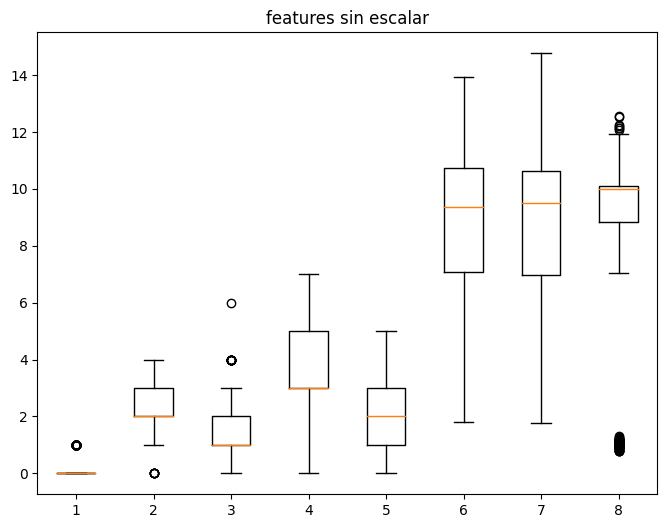

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8, 6))
plt.boxplot(X_train)
plt.title('features sin escalar')
plt.show()

In [7]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

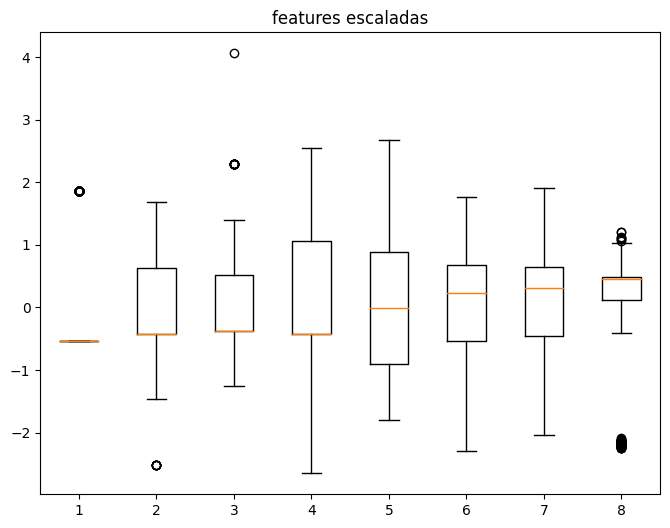

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize= (8, 6))
plt.boxplot(X_train_scl)
plt.title('features escaladas')
plt.show()

#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

In [9]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

selector_atrib = SelectPercentile(mutual_info_classif, percentile = 90)
selector_atrib.fit(X_train_scl, y_train)

SelectPercentile(percentile=90,
                 score_func=<function mutual_info_classif at 0x000001865A45B130>)

In [10]:
X_train_final = selector_atrib.transform(X_train_scl)
X_test_final = selector_atrib.transform(X_test_scl)

In [11]:
# los datos antes de seleccionar atributos
print(X_train_scl.shape)
print(X_test_scl.shape)
print('\n')
# despues de seleccionarlos
print(X_train_final.shape)
print(X_test_final.shape) # se ha eliminado una feature

(393, 8)
(99, 8)


(393, 7)
(99, 7)


#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [12]:
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### NOTA:

primero voy ha hacer el GridSearchCVpara sacar los hiperparametros óptimos, y despues mostraré los resltados del cross validation

#### LOGR

In [13]:
logr = LogisticRegression(fit_intercept= True)
logr_hparams = {'solver': ['lbfgs', 'liblinear','saga'],
                'C': [0.1, 1, 10, 100],
                }

GS_logr = GridSearchCV(estimator= logr,                                         # el modelo
                       param_grid=logr_hparams,                                 # lso hiperparametros
                       cv = KFold(n_splits=5, shuffle=True, random_state=42),   # parametros del cv
                       scoring= 'accuracy',                                     # la metricad deseada
                       n_jobs= -1)                                              # para que el ordenador use todo el cpu

GS_logr.fit(X_train_final, y_train)

print(GS_logr.best_estimator_)
print(GS_logr.best_params_)
print(GS_logr.best_score_)

LogisticRegression(C=0.1, solver='liblinear')
{'C': 0.1, 'solver': 'liblinear'}
0.6842908146705615


#### SVM

In [14]:
svc = SVC()
svc_hparams = {'kernel': ['linear', 'poly', 'rbf'],
               'C': [0.1, 1, 10, 100],
               'gamma': ['auto', 'scale']}

GS_svc = GridSearchCV(estimator= svc,
                       param_grid=svc_hparams,
                       cv = KFold(n_splits=5, shuffle=True, random_state=42),
                       scoring= 'accuracy',
                       n_jobs= -1)

GS_svc.fit(X_train_final, y_train)

print(GS_svc.best_estimator_)
print(GS_svc.best_params_)
print(GS_svc.best_score_) # TENEMOS GANADOR

SVC(C=100, gamma='auto')
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.829438493995456


#### VALIDANDO LOS MODELOS MEDIANTE CROSS VALIDATION

Aunque realmente ya estan validados por la función GridSearchCV, nos vale para evaluar y comparar los resultados

In [15]:
from math import sqrt
algoritmos = {'LOGR': LogisticRegression(C= 0.1, solver=  'liblinear'),
              'SVC': SVC(C= 100, gamma=  'auto', kernel=  'rbf')}

for nombre, algoritmo in algoritmos.items():
    result = cross_val_score(algoritmo, X_train_final, y_train, scoring= 'accuracy', cv= KFold(n_splits=5, shuffle= True, random_state= 42))
    print(f'Para el algorimto \t {nombre} \t se obtiene una exactitud de \t {round(result.mean(), 4)} +- {round(sqrt(result.var()), 4)}')

Para el algorimto 	 LOGR 	 se obtiene una exactitud de 	 0.6843 +- 0.0388
Para el algorimto 	 SVC 	 se obtiene una exactitud de 	 0.8294 +- 0.0431


Se puede observar que los resultados son parecidos a los obtenidos anteriormente

#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM

 #### NOTA:

 No me hace falta volver a entrenar los modelos, ya que la función GridSearchCV mediante el atributo best_estimator_ me devuelve ese modelo ya entrenado.

In [16]:
from sklearn import metrics

# definimos las metricas
metricas = {
  'ACC':    lambda y_true, y_pred: metrics.accuracy_score(y_true, y_pred),
  'PREC':   lambda y_true, y_pred: metrics.precision_score(y_true, y_pred),
  'RECALL': lambda y_true, y_pred: metrics.recall_score(y_true, y_pred),
  'F1':     lambda y_true, y_pred: metrics.f1_score(y_true, y_pred),
  "AUC":    lambda y_true, y_pred: metrics.roc_auc_score(y_true, y_pred)}

# un diccionario con los mejores modelos obtenidos en gridsearch
best_logr = GS_logr.best_estimator_
best_svc = GS_svc.best_estimator_

algoritmos = {'LOGR': best_logr,
              'SVC': best_svc
              }


# calculando las métricas de cada modelo
evaluacion_de_algoritmos = {}                       # guardare las metricas obtenidas para cada modelo en una lista; ---> key: nombre_modelo, value: lista_metricas
for nombre, algoritmo in algoritmos.items():

  resultados = []
  y_pred = algoritmo.predict(X_test_final)
  for nombre_, metrica in metricas.items():
   
    resultados.append(round(metrica(y_test, y_pred), 4))

  evaluacion_de_algoritmos[nombre] = resultados

print(evaluacion_de_algoritmos)

{'LOGR': [0.6263, 0.5965, 0.7083, 0.6476, 0.6287], 'SVC': [0.8687, 0.8571, 0.875, 0.866, 0.8689]}


In [17]:
import pandas as pd

algo_metricas = pd.DataFrame(data= evaluacion_de_algoritmos, index=list(metricas.keys()) )
display(algo_metricas)

# se podrian guardar estos resultados en un CSV

,LOGR,SVC
ACC,0.6263,0.8687
PREC,0.5965,0.8571
RECALL,0.7083,0.8750
F1,0.6476,0.8660
AUC,0.6287,0.8689


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC). 

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
for nombre, algo in algoritmos.items():
    print(f'La matriz de confusion es la siguiente para el modelo {nombre}')
    y_pred = algo.predict(X_test_final)
    print(confusion_matrix(y_true= y_test,y_pred=  y_pred))
    print('\n')

La matriz de confusion es la siguiente para el modelo LOGR
[[28 23]
 [14 34]]


La matriz de confusion es la siguiente para el modelo SVC
[[44  7]
 [ 6 42]]




In [20]:
from sklearn.metrics import roc_curve

In [21]:
y_pred_logr = best_logr.predict(X_test_final)
y_pred_svc = best_svc.predict(X_test_final)

#### NOTA

Aqui he tenido que hacer algunas prubas para sacar la gráfica ROC, aconsejo pasar a donde estan las gráficas y evaluar solo eso por favor

In [22]:
print(y_pred_logr)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0.]


In [23]:
print(y_pred_svc)

[0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0.]


In [24]:
best_logr.predict_proba(X_test_final)

array([[0.50647971, 0.49352029],
       [0.38552424, 0.61447576],
       [0.60817653, 0.39182347],
       [0.74961831, 0.25038169],
       [0.36608295, 0.63391705],
       [0.59081628, 0.40918372],
       [0.3407292 , 0.6592708 ],
       [0.54452807, 0.45547193],
       [0.44450616, 0.55549384],
       [0.67100967, 0.32899033],
       [0.61198885, 0.38801115],
       [0.7219164 , 0.2780836 ],
       [0.48280378, 0.51719622],
       [0.4532712 , 0.5467288 ],
       [0.74825566, 0.25174434],
       [0.44543808, 0.55456192],
       [0.28540533, 0.71459467],
       [0.71941961, 0.28058039],
       [0.44288185, 0.55711815],
       [0.36959705, 0.63040295],
       [0.4738822 , 0.5261178 ],
       [0.50151008, 0.49848992],
       [0.36056182, 0.63943818],
       [0.37879436, 0.62120564],
       [0.48378954, 0.51621046],
       [0.51096928, 0.48903072],
       [0.73794388, 0.26205612],
       [0.43266225, 0.56733775],
       [0.74766866, 0.25233134],
       [0.33189651, 0.66810349],
       [0.

In [25]:
best_logr.classes_ # busco los 1s

array([0., 1.])

In [26]:
best_logr.predict_proba(X_test_final)[:,1] # esta es buena

array([0.49352029, 0.61447576, 0.39182347, 0.25038169, 0.63391705,
       0.40918372, 0.6592708 , 0.45547193, 0.55549384, 0.32899033,
       0.38801115, 0.2780836 , 0.51719622, 0.5467288 , 0.25174434,
       0.55456192, 0.71459467, 0.28058039, 0.55711815, 0.63040295,
       0.5261178 , 0.49848992, 0.63943818, 0.62120564, 0.51621046,
       0.48903072, 0.26205612, 0.56733775, 0.25233134, 0.66810349,
       0.50350524, 0.69928038, 0.7270213 , 0.39733105, 0.45675995,
       0.29289618, 0.55915984, 0.54607313, 0.50142712, 0.72804428,
       0.35284999, 0.58624308, 0.51262528, 0.50970366, 0.51158226,
       0.40781515, 0.5241423 , 0.33115398, 0.48510319, 0.54438153,
       0.52287897, 0.46649786, 0.56944298, 0.38833269, 0.42357529,
       0.5012989 , 0.54296913, 0.82406591, 0.38977982, 0.56259975,
       0.72591775, 0.44702742, 0.51226332, 0.54395493, 0.25588222,
       0.58852516, 0.32371022, 0.31721168, 0.67812619, 0.69280881,
       0.5511727 , 0.7147074 , 0.49788369, 0.31894215, 0.35592

In [27]:
best_svc.decision_function(X_test_final)

array([-0.88071716, -1.29750603,  0.63417745,  0.88930929,  0.35873974,
       -0.02022522,  0.43105127, -2.20451331,  0.93880345,  0.49925021,
       -0.35346797,  1.85063911, -0.38183198,  0.06684554, -1.92128247,
        0.65052241,  2.24229396, -2.35668299,  2.33427767,  2.31254284,
        1.02068444, -0.96258839,  0.79589906,  1.44805945, -0.09310411,
       -5.00885461, -0.75495661, -0.96270724, -1.37512232,  3.82693807,
       -1.00078536,  5.16536511,  0.16270002,  2.43364565, -0.97330633,
        2.0013079 , -0.45537141, -1.25214218, -0.77779279,  1.43901077,
       -1.35741959, -0.88418214, -0.63030054,  1.11218382, -0.07020123,
       -0.86904271, -0.26188401, -2.71186116, -1.09671884, -0.33534398,
        2.21251572,  0.219828  ,  0.85068922, -1.68186444, -3.97819381,
       -0.47659314,  0.7484839 ,  2.06990322, -0.88883574,  0.26400662,
        1.64021327, -0.13135411,  0.03992368,  1.34410628, -0.61899263,
        1.58579776, -0.56351803, -1.52783214,  1.25906648,  1.01

### GRAFICA ROC

In [28]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, best_logr.predict_proba(X_test_final)[:, 1])
fpr_svc, tpr_svc, thersholds_svc = roc_curve(y_test, best_svc.decision_function(X_test_final))

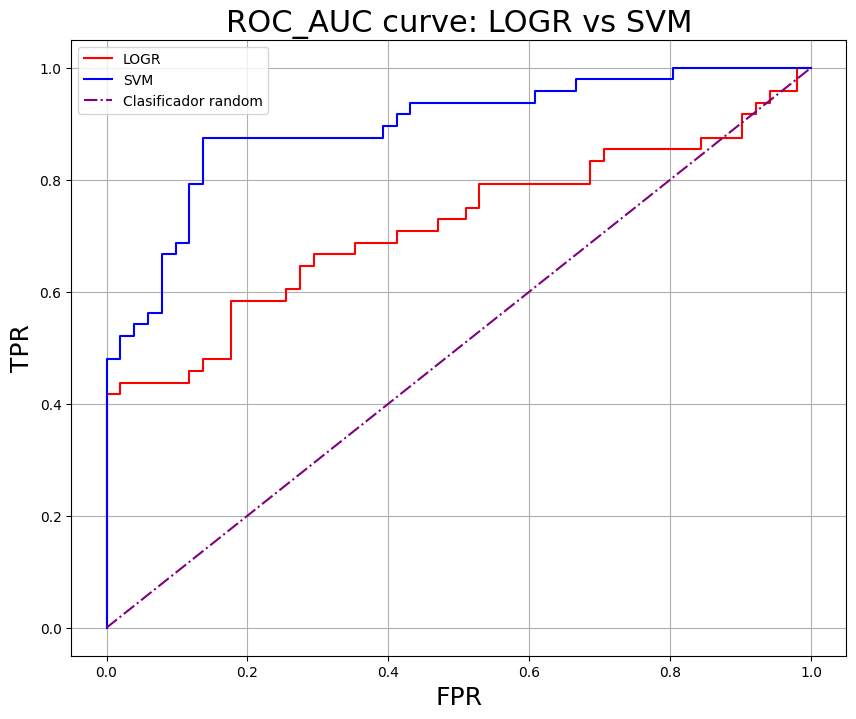

In [29]:
plt.figure(figsize= (10, 8))
plt.plot(fpr_log, tpr_log, c= 'red', label='LOGR')
plt.plot(fpr_svc, tpr_svc, c= 'blue', label='SVM')
plt.plot([0, 1], [0, 1],   c= 'purple', linestyle="-.", label='Clasificador random')
plt.xlabel('FPR', fontdict= {'fontsize': 18})
plt.ylabel('TPR', fontdict= {'fontsize': 18})
plt.title('ROC_AUC curve: LOGR vs SVM', fontdict= {'fontsize': 22})
plt.grid()
plt.legend()
plt.show()

#### 7) Interpretación de resultados (0.5 puntos)
* Justifica brevemente cuál de los dos modelos utilizarías para ponerlo en producción

Me quedaria con el SVC, por el hecho de que es superior en todas las métricas (AUC, F1, PRECISION, RECALL, ACCURACY) que hemos evaluado tanto en el conjunto de entrenamiento, validación y test:

In [30]:
display(algo_metricas)

,LOGR,SVC
ACC,0.6263,0.8687
PREC,0.5965,0.8571
RECALL,0.7083,0.8750
F1,0.6476,0.8660
AUC,0.6287,0.8689


Seguramente será por que los datos seran linealmente separables (gracias al truco de kernel que he aplicado como hiperparametro), aunque quizás, he realizado hiperparameter tunning más intensivo para el algoritmo de SVC.

Como tengo unos minutos voy a explorar los datos un poco, aunque este proceso deberia ser anterior a este

In [31]:
import seaborn as sns

In [32]:
cols = [str(i) for i in range(9)]
df = pd.DataFrame(data, columns= cols)
display(df.sample(10))

num_cols= ['5', '6', '7', '8'] # las columnas numericas, la columna 8 no lo es, pero la necesito para el scatter matrix despues

,0,1,2,3,4,5,6,7,8
330,1.0,3.0,2.0,0.0,5.0,12.826811,11.320632,10.000000,1.0
266,0.0,1.0,0.0,6.0,1.0,8.977134,13.242684,10.000000,1.0
70,0.0,2.0,1.0,3.0,3.0,10.758536,9.249655,10.144724,1.0
392,0.0,4.0,2.0,4.0,1.0,7.158965,1.880755,1.154137,1.0
445,0.0,3.0,0.0,6.0,1.0,2.166653,6.054570,0.964254,0.0
331,1.0,3.0,4.0,3.0,0.0,7.772742,13.951988,10.000000,1.0
404,0.0,1.0,2.0,2.0,3.0,7.198919,2.016131,1.126583,1.0
238,0.0,3.0,0.0,6.0,1.0,8.441156,10.708786,9.750008,0.0
29,0.0,2.0,2.0,2.0,3.0,10.974889,10.212014,11.299504,0.0
134,1.0,3.0,3.0,2.0,2.0,10.971478,8.739054,8.152101,1.0


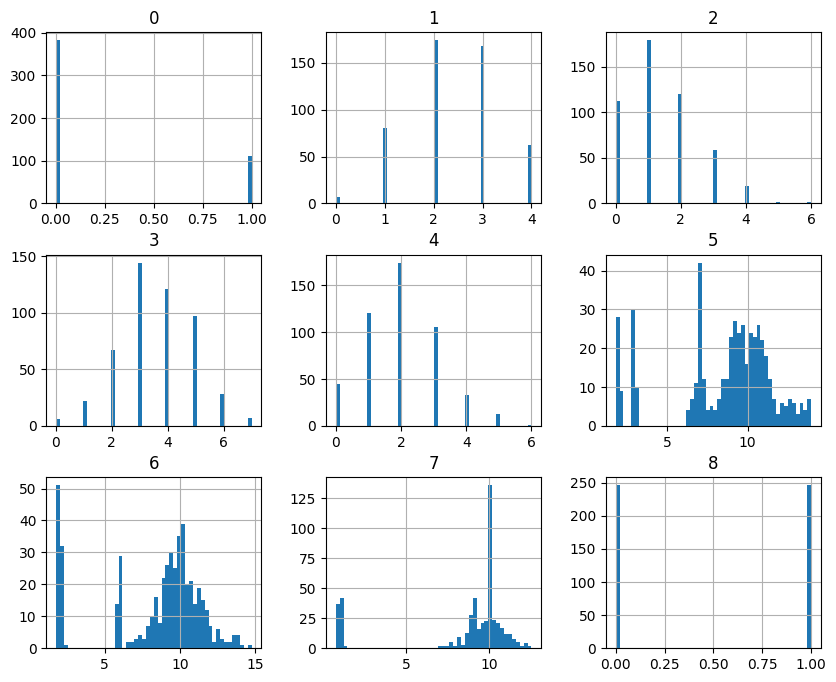

In [33]:
df.hist(bins= 50, figsize= (10,8))
plt.show()

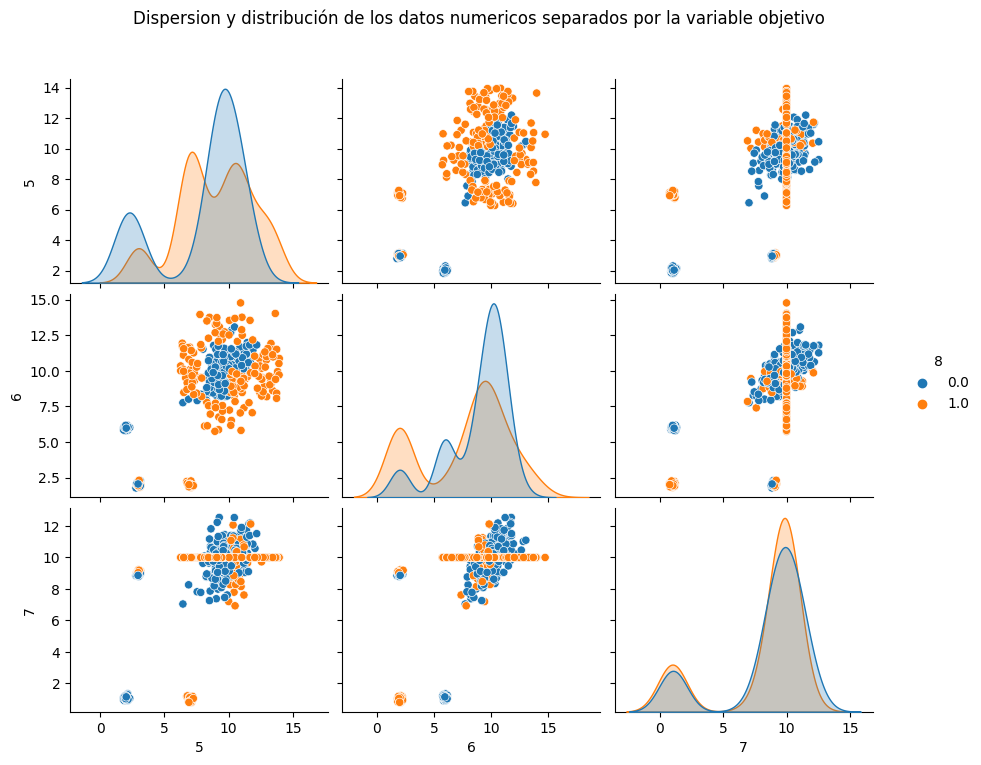

In [34]:
g = sns.pairplot(df[num_cols], hue="8")
g.fig.set_size_inches(10, 7)
g.fig.suptitle('Dispersion y distribución de los datos numericos separados por la variable objetivo', y=1.08)
plt.show()


En este gráfico los datos no son linealmente separables, ademas de que se trata de un espacio de 8 caracteristicas y yo los estoy ploteando en 2D,

- YO CREO QUE DEBIDO AL 'KERNEL TRICK' el SVC obtiene mejores resultados